In [1]:
import torch
import cv2 
from matplotlib import pyplot as plt
import os
import numpy as np
import PIL
from PIL import Image
import h5py

In [1]:
# load whole image[size : (2048, 3072)] in "whole_images" 
from core.data_loader import load_whole_image 
data_path = "Samsung_SNU"
num_per_Ffolder = 16
whole_images = load_whole_image(data_path,num_per_Ffolder)

=== extracting [SET 1] ===
Samsung_SNU/[SET 1]/F32
Samsung_SNU/[SET 1]/F8
Samsung_SNU/[SET 1]/F64
Samsung_SNU/[SET 1]/F16


KeyboardInterrupt: 

In [23]:
whole_images.keys(), whole_images['[SET 1]'].keys(), whole_images['[SET 1]']['F32'].keys()

(dict_keys(['[SET 1]', '[SET 2]', '[SET 3]', '[SET 4]']),
 dict_keys(['F32', 'F8', 'F64', 'F16']),
 dict_keys(['1_F32.png', '2_F32.png', '3_F32.png', '4_F32.png', '5_F32.png', '6_F32.png', '7_F32.png', '8_F32.png', '9_F32.png', '10_F32.png', '11_F32.png', '12_F32.png', '13_F32.png', '14_F32.png', '15_F32.png', '16_F32.png']))

In [3]:
# default setting
main_folder = "./Samsung_SNU_augmented"
os.makedirs(main_folder,exist_ok=True)
image_size = 256
num_x_axis = 2048//image_size
num_y_axis = 3072//image_size
print(num_x_axis,num_y_axis)

8 12


In [1]:
from core.crop_image import scale_f_num_0to3,crop_image, make_image_crop

In [5]:
a = make_image_crop(whole_images,(2048, 3072),256)

[SET 1]->F32
[SET 1]->F8
[SET 1]->F64
[SET 1]->F16
[SET 2]->F32
[SET 2]->F8
[SET 2]->F64
[SET 2]->F16
[SET 3]->F32
[SET 3]->F8
[SET 3]->F64
[SET 3]->F16
[SET 4]->F32
[SET 4]->F8
[SET 4]->F64
[SET 4]->F16


In [6]:
for i in range(4):
    print(i, (a['SET1'][i].shape))

0 (2768, 256, 256)
1 (2768, 256, 256)
2 (2768, 256, 256)
3 (2768, 256, 256)


In [7]:
a['SET1'].shape

(4, 2768, 256, 256)

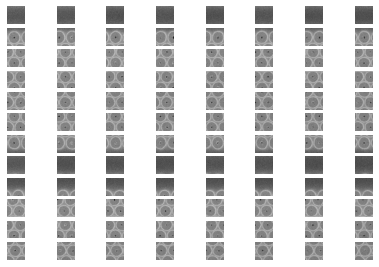

In [59]:
fig, axes = plt.subplots(12,8)
for i in range(12):
    for j in range(8):
        #ax.imshow(a['SET1'][0][i],cmap='gray')
        im = a['SET1'][0][i*12+j]
        axes[i][j].imshow(im,cmap='gray')
        axes[i][j].set_axis_off() #('off')
#fig.subplots_adjust(0,0)
#fig.tight_layout()
#plt.axis('off')
plt.show()

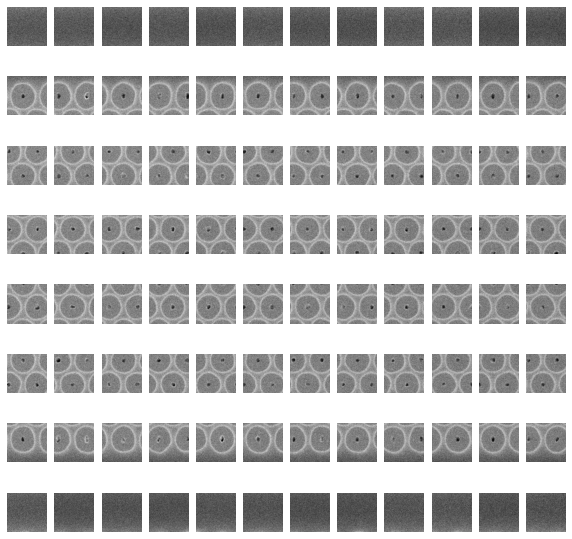

In [63]:
plt.figure(figsize=(10,10))
for i in range(96):
    plt.subplot(8,12,i+1) # 8x12
    plt.imshow(a['SET1'][0][i],cmap='gray')
    plt.axis('off')

#plt.subplots_adjust(0,0)
#plt.tight_layout()
plt.show()

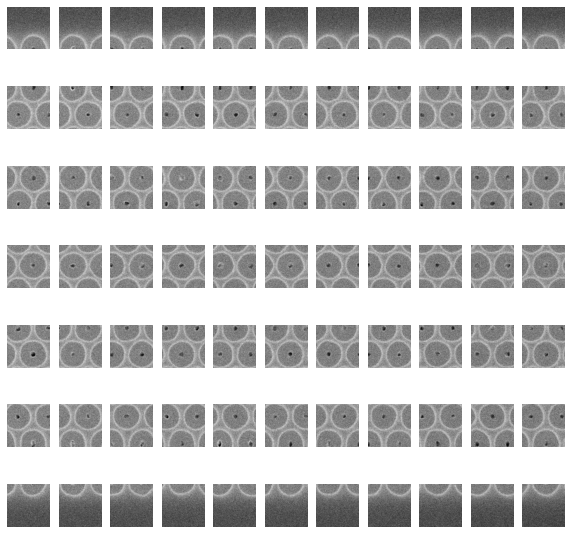

In [64]:
plt.figure(figsize=(10,10))
for i in range(77):
    plt.subplot(7,11,i+1) # 8x12
    plt.imshow(a['SET1'][0][i+96],cmap='gray')
    plt.axis('off')

#plt.subplots_adjust(0,0)
#plt.tight_layout()
plt.show()

In [148]:
# image size : (2048, 3072)
# [128~256,0~256], each step of [+256,+256]
crop_size = 256
num_x_axis = (2048-image_size)//256
num_y_axis = (3072-image_size)//256
# print(num_x_axis,num_y_axis)
#print(f"make {(num_x_axis)*(num_y_axis)} images ({(num_x_axis)} x {(num_y_axis)})")
for set_num in whole_images.keys():
    # print(set_num)
    set_folder = os.path.join(main_folder,set_num)
    os.makedirs(set_folder,exist_ok=True)
    for f_num in whole_images[set_num].keys():
        print(set_num + "-> " + f_num)
        f_index = scale_f_num_0to3(f_num)
        cropped_images = np.zeros([num_x_axis*num_y_axis,crop_size,crop_size])
        for filename in whole_images[set_num][f_num]:
            print(filename.split("_")[0], whole_images[set_num][f_num][filename].shape)
            image = whole_images[set_num][f_num][filename]
            #cropped_images = crop_image(image, crop_size, 128,128,img_write=False)
            print(cropped_images.shape)
            
        break
    print("")
    break


[SET 1]-> F32
1 (2048, 3072)
(77, 256, 256)
2 (2048, 3072)
(77, 256, 256)
3 (2048, 3072)
(77, 256, 256)
4 (2048, 3072)
(77, 256, 256)
5 (2048, 3072)
(77, 256, 256)
6 (2048, 3072)
(77, 256, 256)
7 (2048, 3072)
(77, 256, 256)
8 (2048, 3072)
(77, 256, 256)
9 (2048, 3072)
(77, 256, 256)
10 (2048, 3072)
(77, 256, 256)
11 (2048, 3072)
(77, 256, 256)
12 (2048, 3072)
(77, 256, 256)
13 (2048, 3072)
(77, 256, 256)
14 (2048, 3072)
(77, 256, 256)
15 (2048, 3072)
(77, 256, 256)
16 (2048, 3072)
(77, 256, 256)



In [ ]:
!tree Samsung_SNU_augmented/

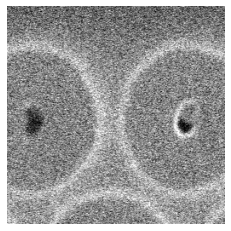

In [83]:
plt.gray()
plt.axis('off')
plt.imshow(a['SET1'][0][13])

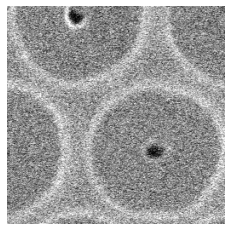

In [107]:
plt.gray()
plt.axis('off')
plt.imshow(a['SET1'][0][96+12])

In [79]:
bins = np.linspace(0,255,256)
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

(array([ 31.,   2.,   3.,   5.,   2.,   3.,   2.,   3.,   8.,   3.,   1.,
          4.,   5.,   5.,   1.,   4.,   8.,   6.,  14.,   7.,   4.,   7.,
          8.,   6.,  11.,  10.,   7.,  11.,  12.,  12.,  19.,  13.,  14.,
         16.,  15.,  23.,  23.,  28.,  22.,  24.,  32.,  27.,  29.,  25.,
         48.,  44.,  44.,  41.,  52.,  46.,  54.,  70.,  50.,  62.,  58.,
         63.,  61.,  99.,  76.,  80.,  72.,  97., 124., 118., 104., 103.,
        122., 129., 124., 135., 139., 147., 192., 147., 172., 162., 170.,
        196., 182., 203., 239., 226., 208., 243., 211., 256., 255., 272.,
        298., 277., 289., 305., 307., 310., 318., 318., 346., 382., 347.,
        356., 357., 404., 379., 423., 429., 436., 402., 463., 474., 455.,
        486., 520., 515., 495., 487., 497., 530., 542., 572., 553., 551.,
        525., 534., 576., 580., 613., 585., 547., 606., 550., 567., 592.,
        609., 618., 659., 605., 593., 590., 658., 596., 598., 571., 594.,
        626., 616., 624., 632., 657., 

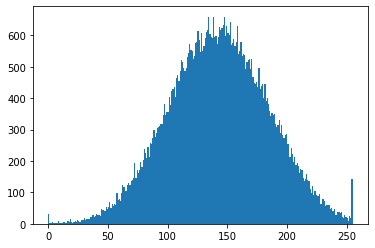

In [96]:
bins = np.linspace(0,255,256)
plt.hist(a['SET1'][0][12].flatten(),bins)

In [17]:
len(os.listdir('Samsung_SNU_augmented/[SET 1]/')

SyntaxError: unexpected EOF while parsing (<ipython-input-17-908b33555b86>, line 1)

In [9]:
# diagnose h5py 
import h5py
with h5py.File('Fivek_train_set.hdf5','r') as f:
    print(list(f.keys()))
    print(f['noisy_info'])
    print(f['clean_images'].shape)
    print(f['noisy_images'].shape)
    print(f['noisy_images'][0][:10])

['clean_images', 'noisy_images', 'noisy_info']
<HDF5 dataset "noisy_info": shape (25000, 2), type "<f4">
(25000, 256, 256)
(25000, 256, 256)
[[0.14011331 0.27923253 0.14147246 ... 0.2514655  0.12517695 0.24328493]
 [0.2800967  0.21826304 0.28975672 ... 0.18779378 0.24648163 0.18755311]
 [0.12902519 0.2868663  0.13318618 ... 0.25173724 0.11779751 0.24645953]
 ...
 [0.29201165 0.21963109 0.27388203 ... 0.19053969 0.24639781 0.18591118]
 [0.14211623 0.28257668 0.14208156 ... 0.25462362 0.11902709 0.25929067]
 [0.2797288  0.20431492 0.28056824 ... 0.1844268  0.24779315 0.18659757]]


In [55]:
# diagnose h5py 
import h5py
with h5py.File("samsung.hdf5","r") as f:
    print(list(f.keys()))
    print(f['noisy_image'].shape)

['noisy_image']
(2048, 3072)


In [54]:
with h5py.File("samsung.hdf5","w") as f:
    f.create_dataset('noisy_image', data=whole_images['[SET 1]']['F8']['1_F8.png'],dtype=np.uint8)

In [28]:
whole_images['[SET 1]']['F8']

{'1_F8.png': array([[109, 130, 186, ...,  74,  66,  87],
        [119, 131, 126, ..., 137, 122,  42],
        [132, 163, 136, ..., 114,  98,  72],
        ...,
        [123, 161, 139, ..., 110, 104,  94],
        [168, 132, 117, ..., 110,  99, 146],
        [ 96, 130, 125, ...,  91, 120, 126]], dtype=uint8),
 '2_F8.png': array([[109,  68, 128, ...,  68,  96,  82],
        [126, 228,  90, ..., 151, 132, 132],
        [ 61, 110,  68, ..., 125, 172, 179],
        ...,
        [ 97, 153, 135, ..., 101, 110, 118],
        [120, 112, 108, ..., 125, 154, 192],
        [150, 118, 132, ..., 128, 121, 128]], dtype=uint8),
 '3_F8.png': array([[155, 159,  96, ..., 141, 100,  84],
        [132, 169, 139, ..., 140, 164, 115],
        [110, 136, 160, ...,  91,  74, 108],
        ...,
        [127, 138, 129, ..., 113,  93, 132],
        [ 82,  26, 107, ...,  96, 153, 131],
        [138, 175, 142, ...,  66, 112, 179]], dtype=uint8),
 '4_F8.png': array([[130, 135, 151, ..., 139,  94,  57],
        [144,